<a href="https://colab.research.google.com/github/enigma11-droid/BigDataTweetSentimentAnalysis/blob/main/BigDataFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re 
from textblob import TextBlob 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data = pd.read_csv('/content/gdrive/My Drive/BigData/FlumeData/cleaneddata.csv',index_col=0)

In [ ]:
def process_tweets(fetched_tweets):
  tweets = []
  for index, row in fetched_tweets.iterrows():
    parsed_tweet = {}
    parsed_tweet['text'] = row['text']
    parsed_tweet['sentiment'] = get_tweet_sentiment(row['text'])
    if row['retweet_count'] > 0:
      if parsed_tweet not in tweets:
        tweets.append(parsed_tweet)
    else:
      tweets.append(parsed_tweet)
  return tweets

In [ ]:
	def clean_tweet(tweet): 
		''' 
		Utility function to clean tweet text by removing links, special characters 
		using simple regex statements. 
		'''
		return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split()) 

In [ ]:
print(clean_tweet(data.loc[0,'text']))

Remmie shiva Watch this at least you could get entertained by the


In [ ]:
def get_tweet_sentiment(tweet): 
		''' 
		Utility function to classify sentiment of passed tweet 
		using textblob's sentiment method 
		'''
		# create TextBlob object of passed tweet text 
		analysis = TextBlob(clean_tweet(tweet)) 
		# set sentiment 
		if analysis.sentiment.polarity > 0: 
			return 'positive'
		elif analysis.sentiment.polarity == 0: 
			return 'neutral'
		else: 
			return 'negative'

In [ ]:
def sentiment_analysis(df):
  # calling function to get tweets
  tweets = process_tweets(df)
  # picking positive tweets from tweets
  print('___________________________________________________________________________________')
  ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
  # percentage of positive tweets
  print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
  # picking negative tweets from tweets
  ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
  # percentage of negative tweets
  print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
  # percentage of neutral tweets
  print("Neutral tweets percentage: {} % ".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)))
  print('___________________________________________________________________________________')
  # printing first 5 positive tweets
  print("\n\nPositive tweets:")
  for tweet in ptweets[:10]:
    print(tweet['text'])
  print('___________________________________________________________________________________')
  # printing first 5 negative tweets
  print("\n\nNegative tweets:")
  for tweet in ntweets[:10]:
    print(tweet['text'])
  print('___________________________________________________________________________________')
  pieplotdata = [len(ptweets),len(tweets)-len(ptweets)+len(ntweets),len(ntweets)]
  return pieplotdata

In [ ]:
pieplotdata = sentiment_analysis(data)

___________________________________________________________________________________
Positive tweets percentage: 37.611477316789454 %
Negative tweets percentage: 8.414113997673518 %
Neutral tweets percentage: 53.97440868553703 % 
___________________________________________________________________________________


Positive tweets:
RT @NOAA_GLERL: We all know #data is important to #science, but so is metadata - or data about data. Examples of #metadata are a dataset's…
@DoctorTruthine1 @news_ntd @EpochTimes Bell shaped curves . . . 

Science is awesome. “Believe” in it or not — it w… https://t.co/5z63BN6vK0
AMA, AHA, ANA back science-based COVID-19 vaccine process, urge vigilance 

READ MORE: https://t.co/aTLNcJAIVu… https://t.co/FncnyZ39bM
Out of date slide being presented in 2020....

VP #Bigdata? Really?
Once again #infrastructure centric not business… https://t.co/AGnxPo6G1K
RT @IAM__Network: AMA, AHA, ANA back science-based COVID-19 vaccine process, urge vigilance 

READ MORE: https

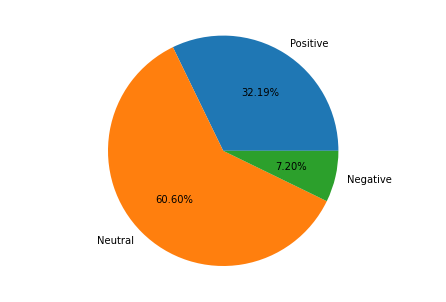

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Positive','Neutral','Negative']
ax.pie(pieplotdata, labels = labels,autopct='%1.2f%%')
plt.show()